In [1]:
import math
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Functions at hand
def y1(d, theta):
    "This is from theta'=delta*exp(theta)-theta"
    "Equation 2 in the write-up"
    return d*math.exp(theta) - theta 

def y1_long(d, theta):
    "This is the large-time approximation given in the write-up"
    return math.exp(theta)/theta - 1/d

def y1_short(d, sigma):
    "This is the short-time approximation given in the write-up"
    return (d/(d-1))*(math.exp((d-1)*sigma) - 1)

def y1_long_class(d, theta):
    "This is the large-time approximation given in class"
    return math.exp(theta)/theta

def y1_short_class(d, sigma):
    "This is the short-time approximation given in class"
    return (d/(d-1))*(math.exp(d-1)*sigma)

def rk4_fizz(f1, d, h, FValues, num_iter):
    "this function performs RK-4to find values of theta"
    
    steps = list(range(num_iter))
    
    for i in steps:
        
        k11 = h*f1(d, FValues['theta'][i])
        k21 = h*f1(d, FValues['theta'][i] + k11/2)
        k31 = h*f1(d, FValues['theta'][i] + k21/2)
        k41 = h*f1(d, FValues['theta'][i] + k31)

        theta = FValues['theta'][i] + (1/6)*(k11 + 2*k21 + 2*k31 + k41)
        
        FValues['theta'].append(theta)
        FValues['sigma'].append(i*h+h) 
        
    return FValues

def bisect(f, p_0, p_1, d, res_list, steps=100):
    "this is the bisection method for root finding"

    for i in range(steps):
        # compute f(p_0), f(p) and p
        f0 = f(d, p_0)
        p  = p_0 + (p_1-p_0)/2
        fp = f(d, p)

        # appending p to our results list
        res_list.append(p)

        # checking our tolerance condition
        if fp == 0 or abs((p-p_0)/p_0) < 10**(-6):
            # if tolerance satisfied, exit the loop
            break
        else:
            i = i+1
            # otherwise, check if p should replace either a or b
            if f0*fp > 0:
                p_0 = p
            else:
                p_1 = p
                
    return res_list

In [3]:
print("Question 1 (a)")
iters = 60

theta_fizz = {'sigma': [0], 'theta':[0]}
res_f = rk4_fizz(f1=y1, d = 1/3, h=0.5, FValues=theta_fizz, num_iter=iters)

# Last value provides expected result
print("The last value of theta is:", res_f['theta'][-1])

pd.DataFrame(res_f)

Question 1 (a)
The last value of theta is: 0.6190566751234435


,sigma,theta
0,0.0,0.000000
1,0.5,0.142306
2,1.0,0.246808
3,1.5,0.325205
4,2.0,0.385059
5,2.5,0.431416
6,3.0,0.467743
7,3.5,0.496484
8,4.0,0.519401
9,4.5,0.537793


In [4]:
# large-time approx
y1_long_res = []
y1_long_root = bisect(y1_long, 0.1, 1, 1/3, y1_long_res)

# short-time approx
## This gives us sigma, not theta...
y1_short_root = list(map(lambda x: y1_short(1/3, x), res_f['sigma']))
y1_long_root[-1]

0.6190615177154541

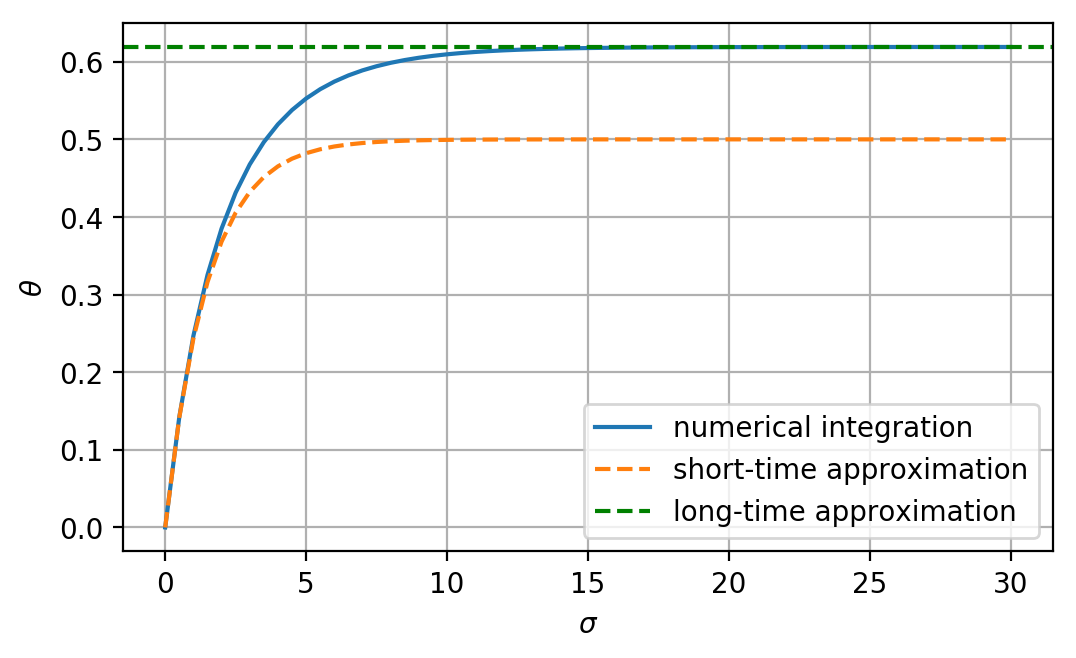

In [5]:
fig1 = plt.figure(figsize = (6, 3.5), dpi = 200)
ax1 = fig1.add_subplot(1, 1, 1)

ax1.grid(b=True, which='major', linestyle='-')
ax1.plot(res_f['sigma'], res_f['theta'], label='numerical integration')
ax1.plot(res_f['sigma'], y1_short_root, label ='short-time approximation', linestyle='--')
ax1.axhline(y=y1_long_root[-1], xmin=0, xmax=1, label = 'long-time approximation', linestyle='--', color='g')
ax1.legend()
ax1.set_xlabel(r'$\sigma$')
ax1.set_ylabel(r'$\theta$')

plt.savefig('Fig2.png')
plt.show()

**Question 2**

In [6]:
def y2(d, theta):
    "This is the function from Q2a"
    return 1/(d*math.exp(theta)-theta)

def sigexp_integral(d, x):
    "this is the integral in 2b"
    return 1/(d*math.exp(x)-x)

def long_time_expl(d, sigma, theta):
    "This is the function from Q2c"
    return sigma - 1/(d*math.exp(theta))

def rk4_expl(f1, d, h, FValues, num_iter):
    "this function performs RK-4to find values of theta"
    
    steps = list(range(num_iter))
    
    for i in steps:
        
        k11 = h*f1(d, FValues['theta'][i])
        k21 = h*f1(d, FValues['theta'][i] + h/2)
        k31 = h*f1(d, FValues['theta'][i] + h/2)
        k41 = h*f1(d, FValues['theta'][i] + h)

        sigma = FValues['sigma'][i] + (1/6)*(k11 + 2*k21 + 2*k31 + k41)
        
        FValues['sigma'].append(sigma)
        FValues['theta'].append(i*h+h) 
        
    return FValues

iters = 120
theta_expl = {'theta': [0], 'sigma':[0]}
tst = rk4_expl(y2, 1, 0.5, theta_expl, iters)
print(str(tst['sigma'][-1]) + "----" + str(tst['theta'][-1]))
pd.DataFrame(tst)

1.3591238768097171----60.0


,sigma,theta
0,0.000000,0.0
1,0.478243,0.5
2,0.843128,1.0
3,1.068361,1.5
4,1.195010,2.0
5,1.265135,2.5
6,1.304474,3.0
7,1.326954,3.5
8,1.340012,4.0
9,1.347695,4.5


In [7]:
def composite_simpson(func, a, b, d, iters):
    "This is Composite Simpson's rule"

    h = (b-a)/iters
    XI0 = func(d, a) + func(d, b)
    XI1 = 0 # Summation of f (x2i−1)
    XI2 = 0 # Summation of f (x2i)

    for i in range(1, iters):
        X = a+i*h
        if (i) % 2 == 0:
            XI2 += func(d, X)
        else:
            XI1 += func(d, X)
        
    XI = h*(XI0 + 2*XI2 + 4*XI1)/3
    return XI

def check_infinity(itersInf):
    "This is to check when we get a value of a function that doesn't change"
    
    res_list = []
    first_res = composite_simpson(sigexp_integral, 0, 1, 1, 100)
    res_list.append(first_res)
    for i in range(1, itersInf):
        ith_res = composite_simpson(sigexp_integral, 0, i+1, 1, i*100)
        res_list.append(ith_res)
        
        if abs(res_list[i] - res_list[i-1]) < 10**(-5):
            break
        
    return res_list, i

In [8]:
sigma_exp, num = check_infinity(100)
print('I get infinity to be equal to {0:2d}, with result {1:f}'.format(num,sigma_exp[-1]))

I get infinity to be equal to 12, with result 1.359096


For the short-time solution, we solve for $\sigma$ to get:

$\sigma = (\frac{1}{\delta-1})ln(\frac{\theta + (\frac{\delta}{\delta -1})}{(\frac{\delta}{\delta - 1})})$

We take the limit as $\delta \rightarrow 1$ using L'Hôpital's rule to get:

$\sigma = \theta$

In [9]:
short_approx_expl = tst['theta']
long_approx_expl = list(map(lambda x: long_time_expl(d=1, sigma=sigma_exp[-1], theta=x), tst['theta']))
long_approx_expl[-1]

pd.DataFrame(tst)

,sigma,theta
0,0.000000,0.0
1,0.478243,0.5
2,0.843128,1.0
3,1.068361,1.5
4,1.195010,2.0
5,1.265135,2.5
6,1.304474,3.0
7,1.326954,3.5
8,1.340012,4.0
9,1.347695,4.5


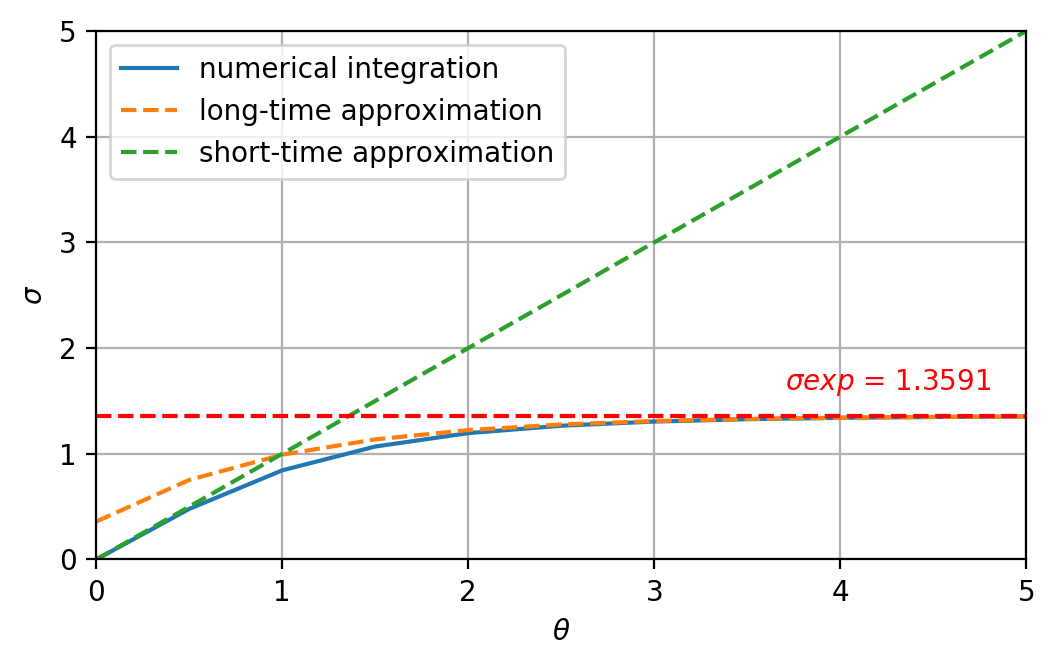

In [14]:
fig2 = plt.figure(figsize = (6, 3.5), dpi = 200)
ax2 = fig2.add_subplot(1, 1, 1)

ax2.grid()
ax2.plot(tst['theta'], tst['sigma'], label='numerical integration')
ax2.plot(tst['theta'], long_approx_expl, label ='long-time approximation', linestyle='--')
ax2.plot(tst['theta'], short_approx_expl, label ='short-time approximation', linestyle='--')
ax2.legend()
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel(r'$\sigma$')
ax2.axhline(y=sigma_exp[-1], xmin=0, xmax=1, label = 'exact asymptote', linestyle='--', color='r')
ax2.set_ylim([0,5])
ax2.set_xlim([0,5])
ax2.text(3.7,1.6, r'$\sigma{exp}$ = '+str(round(sigma_exp[-1], 5)), color = 'r')

plt.savefig('Fig3.png')
plt.show()

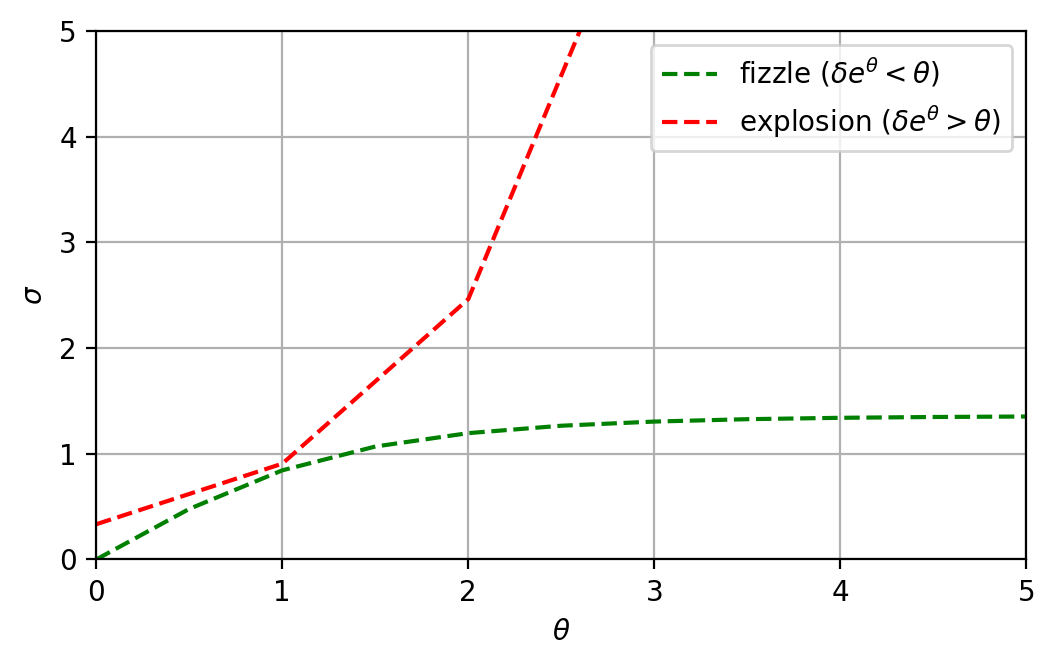

In [12]:
x = range(6)

def f1(d, x):
    return d*math.exp(x)

def f2(x):
    return x

y1_fizz = list(map(lambda x: f1(1/3, x), x))
y2 = f2(x)

fig3 = plt.figure(figsize = (6, 3.5), dpi = 200)
ax3 = fig3.add_subplot(1, 1, 1)

ax3.grid()
ax3.plot(tst['theta'], tst['sigma'], label =r'fizzle ($\delta e^{\theta} < \theta$)', linestyle='--', color = 'g')
ax3.plot(x, y1_fizz, label =r'explosion ($\delta e^{\theta} > \theta$)', linestyle='--', color ='r')
ax3.legend()
ax3.set_xlabel(r'$\theta$')
ax3.set_ylabel(r'$\sigma$')
ax3.set_ylim([0,5])
ax3.set_xlim([0,5])

plt.savefig('Fig1.png')
plt.show()